In [1]:
# reshape the data from long dataframe to a wide dataframe

import pandas as pd

In [2]:
# read in weekly crop data for NC

folder = 'C:/Users/szums/usdaData/'

df = pd.read_csv(folder+'cropsWEEKLYNC.txt', delimiter='\t')

print(f'{len(df)} rows read.')

df['WEEK_ENDING'].info()

101093 rows read.
<class 'pandas.core.series.Series'>
RangeIndex: 101093 entries, 0 to 101092
Series name: WEEK_ENDING
Non-Null Count   Dtype 
--------------   ----- 
101093 non-null  object
dtypes: object(1)
memory usage: 789.9+ KB


In [3]:
# how many columns are we going to want?

display(len(df['SHORT_DESC'].value_counts()))

# convert week_ending to datetime

df['WEEK_ENDING'] = pd.to_datetime(df['WEEK_ENDING'])

# get the data sorted so we know where we're starting from

dfsort = df.sort_values(by=['SHORT_DESC','WEEK_ENDING'])
display(dfsort.head())



412

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,...,LOCATION_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%
45365,SURVEY,CROPS,FRUIT & TREE NUTS,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"APPLES - CONDITION, 5 YEAR AVG, MEASURED IN PC...",...,NORTH CAROLINA,2014,WEEKLY,31,31,WEEK #31,2014-08-03,8/4/2014 16:10,6.0,NaN
21595,SURVEY,CROPS,FRUIT & TREE NUTS,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"APPLES - CONDITION, 5 YEAR AVG, MEASURED IN PC...",...,NORTH CAROLINA,2014,WEEKLY,32,32,WEEK #32,2014-08-10,8/11/2014 16:32,15.0,NaN
82188,SURVEY,CROPS,FRUIT & TREE NUTS,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"APPLES - CONDITION, 5 YEAR AVG, MEASURED IN PC...",...,NORTH CAROLINA,2014,WEEKLY,33,33,WEEK #33,2014-08-17,8/18/2014 16:18,20.0,NaN
14062,SURVEY,CROPS,FRUIT & TREE NUTS,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"APPLES - CONDITION, 5 YEAR AVG, MEASURED IN PC...",...,NORTH CAROLINA,2014,WEEKLY,34,34,WEEK #34,2014-08-24,8/25/2014 16:05,24.0,NaN
76851,SURVEY,CROPS,FRUIT & TREE NUTS,APPLES,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,"CONDITION, 5 YEAR AVG",PCT EXCELLENT,"APPLES - CONDITION, 5 YEAR AVG, MEASURED IN PC...",...,NORTH CAROLINA,2014,WEEKLY,35,35,WEEK #35,2014-08-31,9/2/2014 16:05,25.0,NaN


In [4]:
def add_column(df1,short_desc,value_name):

    retval = df1[df1['SHORT_DESC'] == short_desc][['WEEK_ENDING','VALUE']].reset_index(drop=True)
    #display(retval.head())
    
    retval.rename(columns={'VALUE':value_name},inplace=True)
    #display(retval.head())

    return  retval


def append_column(aggregatingdf,newcol):
    aggregatingdf = pd.merge(aggregatingdf,newcol,on='WEEK_ENDING',how='outer')
    return aggregatingdf

In [5]:
# lets chop off all the unneeded columns

df1 = dfsort[['SHORT_DESC','WEEK_ENDING','VALUE']]

# now let's do some reshaping.  just a few columns at first

new_df = df[['WEEK_ENDING']].drop_duplicates().reset_index(drop=True)
new_df = new_df.sort_values(by=['WEEK_ENDING'])


new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT PLANTED','CORN_PLANTED'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT EMERGED','CORN_EMERGED'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT SILKING','CORN_SILKING'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT DOUGH','CORN_DOUGH'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT DENTED','CORN_DENTED'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, MEASURED IN PCT MATURE','CORN_MATURE'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT PLANTED','CORN_PLANTED_5AVG'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT EMERGED','CORN_EMERGED_5AVG'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT SILKING','CORN_SILKING_5AVG'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT DOUGH','CORN_DOUGH_5AVG'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT DENTED','CORN_DENTED_5AVG'))
new_df = append_column(new_df,add_column(df1,'CORN - PROGRESS, 5 YEAR AVG, MEASURED IN PCT MATURE','CORN_MATURE_5AVG'))


new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT PLANTED','BEANS_PLANTED'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT EMERGED','BEANS_EMERGED'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT BLOOMING','BEANS_BLOOMING'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT SETTING PODS','BEANS_SETTING'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT DROPPING LEAVES','BEANS_DROPPING'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, MEASURED IN PCT HARVESTED','BEANS_HARVESTED'))

new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT PLANTED','BEANS_PLANTED_5AVG'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT EMERGED','BEANS_EMERGED_5AVG'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT BLOOMING','BEANS_BLOOMING_5AVG'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT SETTING PODS','BEANS_SETTING_5AVG'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT DROPPING LEAVES','BEANS_DROPPING_5AVG'))
new_df = append_column(new_df,add_column(df1,'SOYBEANS - PROGRESS, 5 YEAR AVG, MEASURED IN PCT HARVESTED','BEANS_HARVESTED_5AVG'))




print(new_df[-14:])


     WEEK_ENDING  CORN_PLANTED  CORN_EMERGED  CORN_SILKING  CORN_DOUGH  \
1738  2024-05-12          95.0          81.0           NaN         NaN   
1739  2024-05-19          98.0          90.0           NaN         NaN   
1740  2024-05-26         100.0          91.0           NaN         NaN   
1741  2024-06-02         100.0          97.0           1.0         NaN   
1742  2024-06-09         100.0          98.0           6.0         NaN   
1743  2024-06-16           NaN         100.0          23.0         0.0   
1744  2024-06-23           NaN         100.0          43.0         3.0   
1745  2024-06-30           NaN           NaN          63.0        11.0   
1746  2024-07-07           NaN           NaN          79.0        26.0   
1747  2024-07-14           NaN           NaN          85.0        43.0   
1748  2024-07-21           NaN           NaN          91.0        58.0   
1749  2024-07-28           NaN           NaN          95.0        74.0   
1750  2024-08-04           NaN        

In [6]:

new_df.to_pickle(folder+'cropsWEEKLYNCwide.pkl')

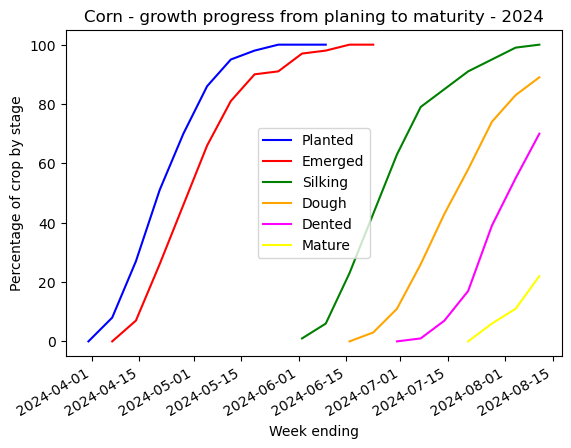

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_PLANTED', label='Planted', color='blue', kind='line', ax=ax)
new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_EMERGED', label='Emerged', color='red',kind='line', ax=ax)
new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_SILKING', label='Silking', color='green', kind='line', ax=ax)
new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_DOUGH', label='Dough', color='orange',kind='line', ax=ax)
new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_DENTED', label='Dented', color='magenta', kind='line', ax=ax)
new_df[new_df['WEEK_ENDING'] > "2024-01-01"].plot(x='WEEK_ENDING',y='CORN_MATURE', label='Mature', color='yellow',kind='line', ax=ax)
plt.title('Corn - growth progress from planting to maturity - 2024')
plt.xlabel('Week ending')
plt.ylabel('Percentage of crop by stage')
plt.legend()
plt.show()
